In [2]:
import pandas as pd

data = pd.read_csv("clustering_datasets.csv")

data.head()


,x,y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682


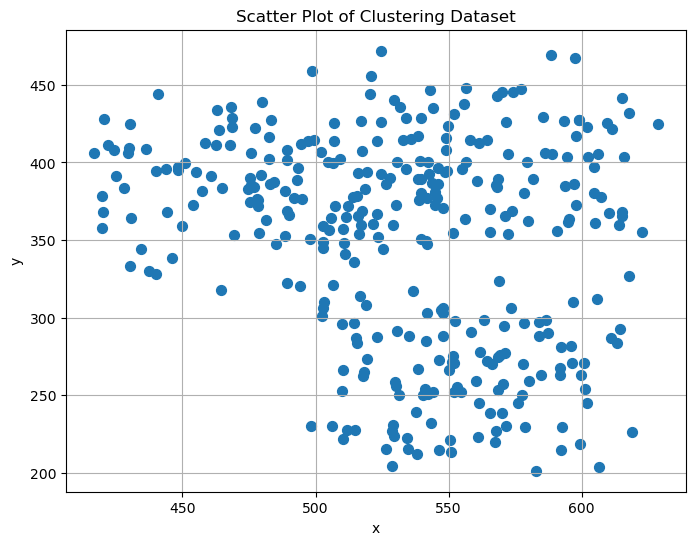

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], s=50)
plt.title("Scatter Plot of Clustering Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

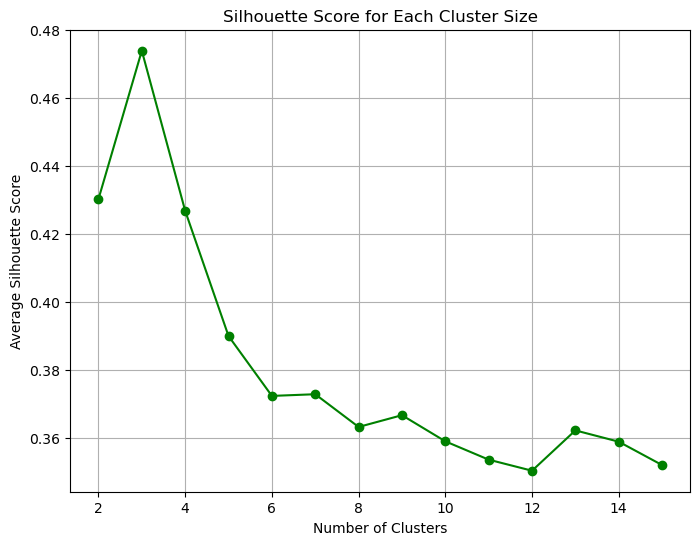

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

from sklearn.impute import SimpleImputer

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data to fill missing values
data_filled = imputer.fit_transform(data)

imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

cluster_range = range(2, 16)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title("Silhouette Score for Each Cluster Size")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

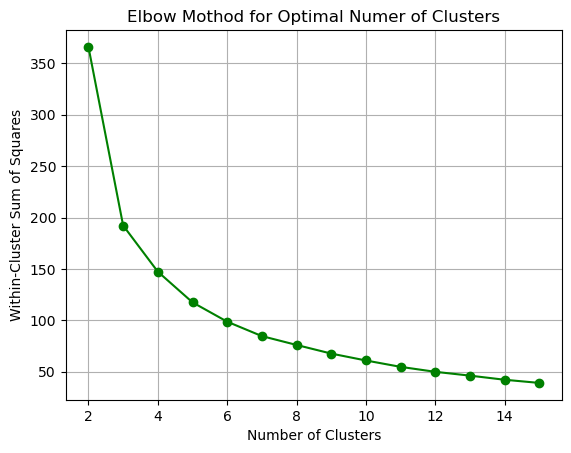

In [6]:
from sklearn.impute import SimpleImputer  # Corrected import statement

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

cluster_range = range(2, 16)
inertia = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)  # Corrected spelling
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='green')
plt.title("Elbow Mothod for Optimal Numer of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()

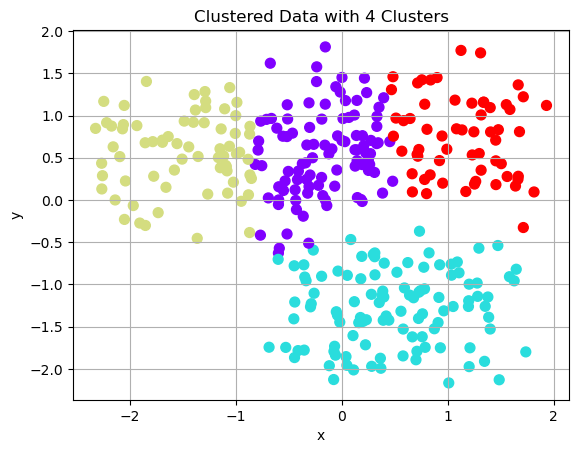

In [7]:
optimal_num_clusters = 4

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title(f"Clustered Data with {optimal_num_clusters} Clusters")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()